In [1]:
import os
import sys
import librosa
import seaborn as sn
sys.path.append(os.path.abspath(os.path.join('../')))
from scripts.audio_loader import AudioLoader
from scripts.audio_manuplator import AudioManipulator
import scripts.visualize as vis
from scripts.results_pickler import ResultPickler
# import audio_manuplator as am
import pandas as pd
import matplotlib.pyplot as plt

## Load Audio files

In [2]:
al_train = AudioLoader(directory='../data/train')
al_test = AudioLoader(directory="../data/test",tts_file=r'/trsTest.txt')

AudioExplorer:INFO->Successfully Created AudioExplorer Class
AudioExplorer:INFO->Successfully Loaded Audio and TTS files
AudioPreprocessor:INFO->Successfully Inherited AudioExplorer Class
AudioPreprocessor:INFO->Successfully Inherited AudioExplorer Class
AudioExplorer:INFO->Successfully Created AudioExplorer Class


tr_1003_tr11004


AudioExplorer:INFO->Successfully Loaded Audio and TTS files
AudioPreprocessor:INFO->Successfully Inherited AudioExplorer Class
AudioPreprocessor:INFO->Successfully Inherited AudioExplorer Class


16_d516025


In [17]:
# df_train_audio= al_train.get_audio_info()
# df_train_audio_data_tts = al_train.get_audio_info_with_data_tts()
df_train_audio_data = al_train.get_audio_info_with_data()
# df_test_audio= al_test.get_audio_info()
# df_test_audio_data_tts = al_test.get_audio_info_with_data_tts()
df_test_audio_data = al_test.get_audio_info_with_data()

# rp = ResultPickler()
# rp.add_data('TrainAudioInfoWithoutDataTTS',df_train_audio)
# rp.add_data('TrainAudioInfoWithDataTTS',df_train_audio_data_tts)
# rp.add_data('TrainAudioInfoWithoutTTS',df_train_audio_data)
# rp.add_data('TestAudioInfoWithoutDataTTS',df_train_audio)
# rp.add_data('TestAudioInfoWithDataTTS',df_test_audio_data_tts)
# rp.add_data('TestAudioInfoWithoutTTS',df_test_audio_data)
# rp.save_data('../models/LoadedAudioInfo.pkl')
# rp = ResultPickler()
# rp.load_data("../models/LoadedAudioInfo.pkl")
# data_dict = rp.get_data()
# df_train_audio = data_dict['TrainAudioInfoWithoutTTS']
# df_test_audio = data_dict['TestAudioInfoWithoutTTS']
df_train_audio_data.head(3)


,Name,Duration,Channels,SamplingRate,TimeSeriesData,HasTTS
0,tr_1003_tr11004,4.736,Stereo,22050,"[-0.02296667, -0.025702173, -0.021117976, -0.0...",True
1,tr_10577_tr30138,8.576,Stereo,22050,"[-0.12479032, -0.14080827, -0.11907358, -0.128...",True
2,tr_10617_tr04131,4.608,Stereo,22050,"[-0.11288287, -0.1282276, -0.109205775, -0.117...",True


In [18]:
# instantiate audio manuplator class
am_train = AudioManipulator(df_train_audio_data)


AudioPreprocessor:ERROR->successfully Initialized AudioPreprocessor class!
NoneType: None
AudioPreprocessor:ERROR->successfully Initialized AudioPreprocessor class!
NoneType: None


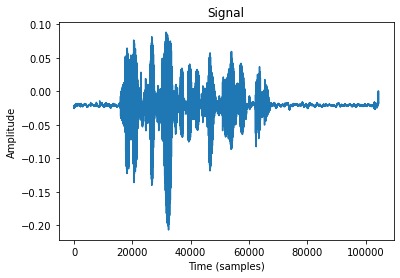

In [19]:
# Plot Time Series data of 
vis.plot_series(df_train_audio_data.loc[0,"TimeSeriesData"])


In [20]:
# count sampling rate frequencies
pd.DataFrame({"count": df_train_audio_data.groupby("SamplingRate")["SamplingRate"].count()})


,count
SamplingRate,
22050,1000


### All 1000 files have the same sampling rate, which is 22050. However, we will look at the sampling rates of the test data since we need to make them the same.

In [21]:
pd.DataFrame({"count": df_test_audio_data.groupby("SamplingRate")["SamplingRate"].count(),"total": df_test_audio['SamplingRate'].count()})

,count,total
SamplingRate,,
22050,359,359


### Since our sampling rate is the same all across and good enough for training. We will move on to checking the length of the audio data.

/home/dibora/AMH-STT/STT/lib/python3.7/site-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


<Figure size 576x288 with 0 Axes>

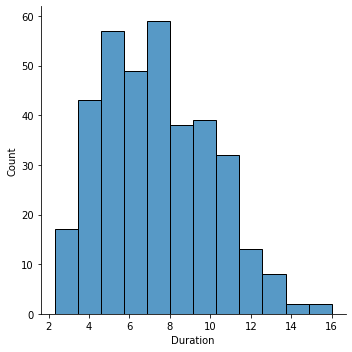

count    359.000000
mean       7.330306
std        2.725577
min        2.304000
25%        5.120000
50%        7.040000
75%        9.216000
max       16.000000
Name: Duration, dtype: float64

In [23]:
ax = plt.figure(figsize = [8,4])
sn.displot(df_test_audio_data['Duration'], ax=ax)
plt.show()
df_test_audio_data['Duration'].describe()

#### We can see more than 75% of the train data has duration less than 6 minutes and test data has less than 9 minutes.so we might want to remove the files with duration greater than 8 minutes since truncating/padding data might not seem the best choice.

### After we have resized them, we will convert their channel to mono

In [24]:
# convert to channel to mono
am_train.convert_to_mono()


,Name,Duration,Channels,SamplingRate,TimeSeriesData,HasTTS
0,tr_1003_tr11004,4.736,Mono,22050,"[-0.02296667, -0.025702173, -0.021117976, -0.0...",True
1,tr_10577_tr30138,8.576,Mono,22050,"[-0.12479032, -0.14080827, -0.11907358, -0.128...",True
2,tr_10617_tr04131,4.608,Mono,22050,"[-0.11288287, -0.1282276, -0.109205775, -0.117...",True
3,tr_10399_tr23101,3.200,Mono,22050,"[-0.123685576, -0.14053547, -0.11865727, -0.12...",True
4,tr_10379_tr100101,4.224,Mono,22050,"[-0.12720865, -0.14362668, -0.12089806, -0.130...",True
...,...,...,...,...,...,...
995,tr_1016_tr11017,11.422,Mono,22050,"[-0.019123629, -0.021636378, -0.018436395, -0....",True
996,tr_10054_tr098016,4.608,Mono,22050,"[-0.1266297, -0.14301273, -0.11997274, -0.1288...",True
997,tr_10_tr01010,10.368,Mono,22050,"[-0.0056225406, -0.0065416396, -0.0056427685, ...",True
998,tr_10370_tr100092,3.584,Mono,22050,"[-0.12003813, -0.13634776, -0.11590275, -0.125...",True


In [25]:
#preprocessing steps
# change the duration to the same size
# convert channels to mono
# standardize the sampling rate to 22500
# create a pipeline for them


## Feature Extraction
### We can now extract features

In [26]:
# am = AudioManipulator(df_train_audio)
features = am_train.extract_features()

In [27]:
features.head()

,Name,Melspectogram,Melspectogram_db
0,tr_1003_tr11004,"[[2.7999938, 2.22991, 2.341877, 1.9912064, 2.4...","[[-6.3387947, -7.3274927, -7.114725, -7.819203..."
1,tr_10577_tr30138,"[[81.9853, 84.2556, 82.72198, 82.07924, 84.183...","[[-0.99972725, -0.8810997, -0.9608784, -0.9947..."
2,tr_10617_tr04131,"[[83.93477, 83.93013, 84.41553, 86.265305, 85....","[[-0.66620255, -0.66644096, -0.6413975, -0.547..."
3,tr_10399_tr23101,"[[83.76131, 84.0579, 82.84393, 79.1557, 84.858...","[[-2.154789, -2.1394386, -2.2026157, -2.400402..."
4,tr_10379_tr100101,"[[85.268814, 84.09296, 85.56079, 84.65236, 85....","[[-0.74834824, -0.8086529, -0.73350143, -0.779..."


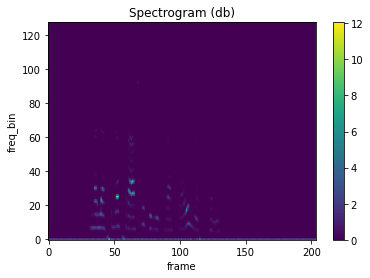

In [28]:
vis.plot_spectrogram(features.loc[0,'Melspectogram'])

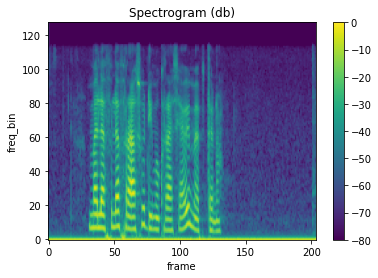

In [29]:
vis.plot_spectrogram(features.loc[0,'Melspectogram_db'])